# Game of Life implementation


### This program is a simple Game of Life Python implementation. 

______________________________________________________________________________________________________________________
Importing necessary libraries and initializing basicvariables

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ON = 255
OFF = 0
vals = [ON, OFF]

Define method that generate N\*N grid with random cells 

In [2]:
def randomGrid(N, probability):
    """returns a grid of NxN random values"""
    return np.random.choice(vals, N*N, p=[1 - probability, probability]).reshape(N, N)

Define method that will update our grid on each iteration

In [3]:
def update(frameNum, img, grid, N, under, over, repr):
    # copy grid since we require 8 neighbors for calculation
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
            # compute 8-neighbor sum using boundary conditions - x and y wrap around
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                         grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                         grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                         grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
            # apply rules
            if grid[i, j]  == ON:
                if (total < under) or (total > over):
                    newGrid[i, j] = OFF
            else:
                if total == repr:
                    newGrid[i, j] = ON
    # update data
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img

Define parametres of Algorithm such as grid's length, rules, etc.

In [4]:
N = 100                  # grid's length
probability = 0.8        # probability for input data generation
updateInterval = 50

# choosing rules. This is Conway's rules
underpopulation = 2
overpopulation = 3
reproduction = 3

# set number of frames
frames = 50

# declare grid
grid = randomGrid(N, probability)



Setting up an animation using matplotlib.animation and saving it into gif file

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


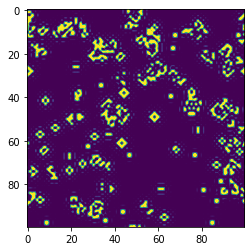

In [5]:
# set up animation
fig, ax = plt.subplots()
img = ax.imshow(grid, interpolation='sinc')
ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, underpopulation, overpopulation, reproduction),
                                  frames = 50,
                                  interval=updateInterval)

    # # of frames?
    # set output file

ani.save(filename='./gifs/conway_random-grid.gif', fps=20, writer='PillowWriter')

![gif](gifs/conway_random-grid.gif "gif")

Also we can experiment with the different configuration of rules and probability

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


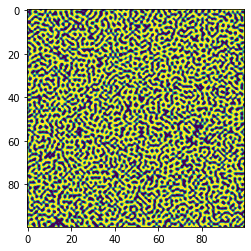

In [6]:
N = 100
probability = 0.4
updateInterval = 50

# use Conway's rules
underpopulation = 3
overpopulation = 5
reproduction = 3

# set number of frames
frames = 50

# declare grid
grid = randomGrid(N, probability)


# set up animation
fig, ax = plt.subplots()
img = ax.imshow(grid, interpolation='sinc')
ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, underpopulation, overpopulation, reproduction),
                                  frames = 50,
                                  interval=updateInterval)

    # # of frames?
    # set output file

ani.save(filename='./gifs/alternative-rules.gif', fps=20, writer='PillowWriter')




![gif](gifs/alternative-rules.gif "gif")

Using the specific cofiguration of grid you can get interesting results. Here is a couple of examples:

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


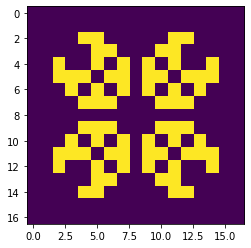

In [7]:
N = 17

updateInterval = 50

# use Conway's rules
underpopulation = 2
overpopulation = 3
reproduction = 3

# declare grid
pulsar = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 255, 0, 0, 0, 0, 255, 0, 255, 0, 0, 0, 0, 255, 0, 0],
                   [0, 0, 255, 0, 0, 0, 0, 255, 0, 255, 0, 0, 0, 0, 255, 0, 0],
                   [0, 0, 255, 0, 0, 0, 0, 255, 0, 255, 0, 0, 0, 0, 255, 0, 0],
                   [0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0],
                   [0, 0, 255, 0, 0, 0, 0, 255, 0, 255, 0, 0, 0, 0, 255, 0, 0],
                   [0, 0, 255, 0, 0, 0, 0, 255, 0, 255, 0, 0, 0, 0, 255, 0, 0],
                   [0, 0, 255, 0, 0, 0, 0, 255, 0, 255, 0, 0, 0, 0, 255, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],])


# set up animation
fig, ax = plt.subplots()
img = ax.imshow(pulsar, interpolation='none')
ani = animation.FuncAnimation(fig, update, fargs=(img, pulsar, N, underpopulation, overpopulation, reproduction),
                                  frames = 6,
                                  interval=updateInterval)

    # # of frames?
    # set output file

ani.save(filename='./gifs/pulsar.gif', fps=3, writer='PillowWriter')


![gif](gifs/pulsar.gif "gif")

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


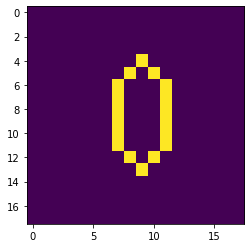

In [9]:
N = 18

updateInterval = 50

# use Conway's rules
underpopulation = 2
overpopulation = 3
reproduction = 3

# declare grid
decathlon = np.zeros(N*N).reshape(N,N)

decathlon[4][9] = decathlon[5][9] = 255
decathlon[6][8] = decathlon[6][10] = 255
decathlon[7][9] = decathlon[8][9] = decathlon[9][9] = decathlon[10][9] = 255
decathlon[11][8] = decathlon[11][10] = 255
decathlon[12][9] = decathlon[13][9] = 255

# set up animation
fig, ax = plt.subplots()
img = ax.imshow(decathlon, interpolation='none')
ani = animation.FuncAnimation(fig, update, fargs=(img, decathlon, N, underpopulation, overpopulation, reproduction),
                                  frames = 15,
                                  interval=updateInterval)

    # # of frames?
    # set output file

ani.save(filename='./gifs/decathlon.gif', fps=3, writer='PillowWriter')

![gif](gifs/decathlon.gif "gif")